In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/car_price.csv')

## 2.2 Data preparation

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
col_strings = list(df.dtypes[df.dtypes == 'object'].index)
col_strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [5]:
for col in col_strings:
    df[col] =  df[col].str.lower().str.replace(' ', '_')

# Exploratory Data Analysis

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Distribution of price

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

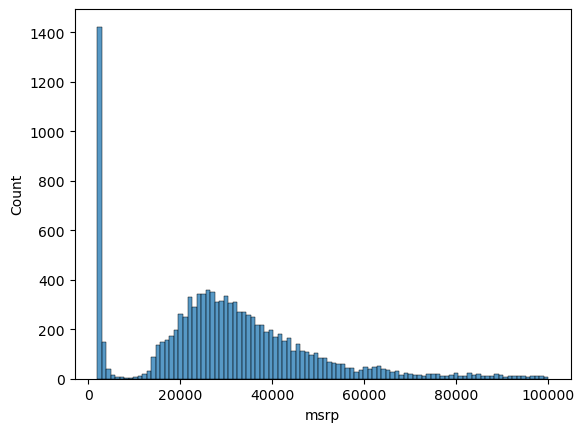

In [8]:
sns.histplot(df.msrp[df.msrp < 100000], bins=100)

<Axes: xlabel='msrp', ylabel='Count'>

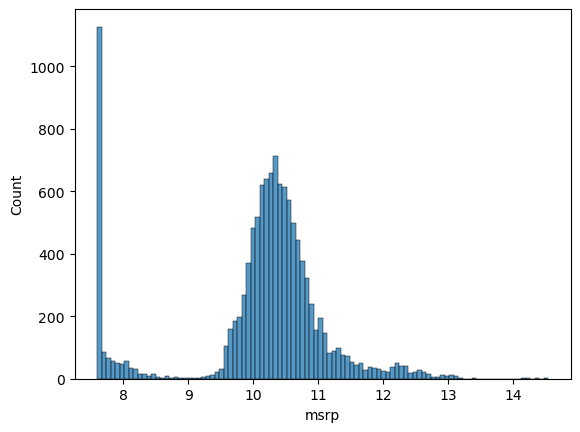

In [9]:
sns.histplot(np.log1p(df.msrp), bins = 100)

### Missing values

In [10]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework  

In [11]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)
n, (n_val+n_test+n_train)

(11914, 11914)

In [12]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:(n_val+n_test)]
df_train = df.iloc[(n_val+n_test):]

### shuffle data to avoid grouping in either training, validation, test sets

In [13]:
idx = np.arange(n)

In [14]:
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:(n_train+n_val)]]
df_test = df.iloc[idx[(n_train+n_val):]]

In [16]:
df_train.head


<bound method NDFrame.head of               make        model  year                engine_fuel_type  \
2735     chevrolet       cobalt  2008                regular_unleaded   
6720        toyota       matrix  2012                regular_unleaded   
5878        subaru      impreza  2016                regular_unleaded   
11190   volkswagen      vanagon  1991                regular_unleaded   
4554          ford        f-150  2017        flex-fuel_(unleaded/e85)   
...            ...          ...   ...                             ...   
434            bmw     4_series  2015     premium_unleaded_(required)   
1902    volkswagen       beetle  2015  premium_unleaded_(recommended)   
9334           gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
5284   rolls-royce        ghost  2014     premium_unleaded_(required)   
2420    volkswagen           cc  2017  premium_unleaded_(recommended)   

       engine_hp  engine_cylinders transmission_type      driven_wheels  \
2735       148.0  

In [17]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [18]:
# reset index (cosmetic)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [20]:
# normalize outcome to improve prediction
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [21]:
# avoid information leakage into training
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.5 Linear regression

In [22]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [23]:
df_train.iloc[10][['engine_hp', 'city_mpg', 'popularity']]

engine_hp     453.0
city_mpg         11
popularity       86
Name: 10, dtype: object

In [24]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [25]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred += w[j] * xi[j]

    #do something
    return pred

In [26]:
linear_regression(xi)

12.312

In [27]:
np.expm1x(12.312)

np.float64(222347.2221101062)

In [28]:
# use dot product
def linear_regression(xi, w):
    xi = [1] + xi
    return np.dot(xi, w)

In [29]:
linear_regression(xi, w = [w0] + w)

np.float64(12.312)

In [30]:
# array X
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [31]:
def linear_regression(X, w):
    return X.dot(w)

In [32]:
linear_regression(X, w = [w0] + w)

array([12.38 , 13.552, 12.312])

### Train a linear model

In [33]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [34]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [35]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    #graham matrix
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return(w[0], w[1:])

In [36]:
train_linear_regression(X, y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price baseline model

In [37]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [38]:
col_num = list(df_train.dtypes[df_train.dtypes != 'object'].index)
col_num

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [39]:
# match subset of numeric fields used in lecture
col_num.remove('year')
col_num.remove('number_of_doors')
col_num

#base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
#        'city_mpg', 'popularity']
#df_train.columns

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [40]:
# check for missing values
df_train[col_num].isnull().sum()


engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [48]:
# extract numpy array & impute missing
X_train = df_train[col_num].fillna(0).values


w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

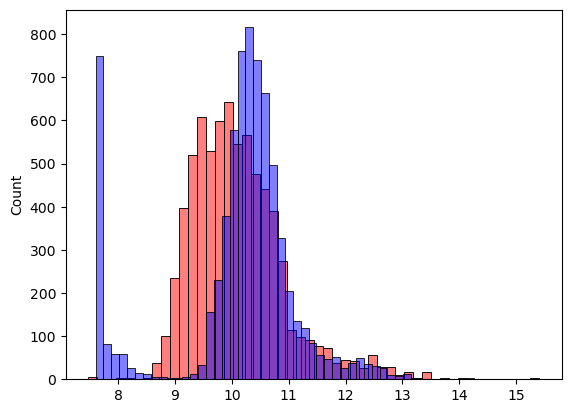

In [42]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color = 'blue', alpha=0.5, bins=50)

In [43]:
# RMSE
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [44]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

In [ ]:
def prepare_X(df, features):

    # avoid modification of input dataframe
    df = df.copy()

    # simple data engineering
    df['age'] = 2017 - df['year']

    df_num = df[features]
    # impute missing
    df_num = df_num.fillna(0)
    # extract numpy array
    X = df_num.values

    return(X)

In [62]:

X_train = prepare_X(df_train, features = col_num + ['age'])
w0, w = train_linear_regression(X_train, y_train)

# RMSE validation error
X_val = prepare_X(df_val, features = col_num + ['age'])
y_pred = w0 + X_val.dot(w)

rmse(y_val , y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

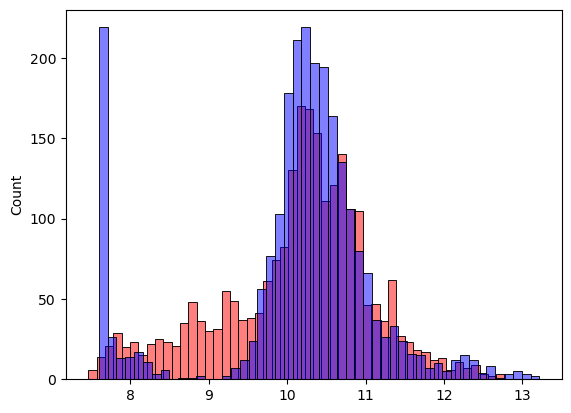

In [63]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color = 'blue', alpha=0.5, bins=50)

## 2.12 Categorical variable

In [ ]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    # top 5 categories
    categorical[c] = list(df_train[c].value_counts().head().index)

In [114]:
categoricalcategorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categoricalcategorical_columns:
    #print(c, " = ", df_train[c].value_counts().head(1).index)
    categorical[c] = df_train[c].value_counts().head().index

categorical

{'make': Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object', name='make'),
 'model': Index(['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'], dtype='object', name='model'),
 'engine_fuel_type': Index(['regular_unleaded', 'premium_unleaded_(required)',
        'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel'],
       dtype='object', name='engine_fuel_type'),
 'driven_wheels': Index(['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive',
        'four_wheel_drive'],
       dtype='object', name='driven_wheels'),
 'market_category': Index(['crossover', 'flex_fuel', 'luxury', 'hatchback', 'luxury,performance'], dtype='object', name='market_category'),
 'vehicle_size': Index(['compact', 'midsize', 'large'], dtype='object', name='vehicle_size'),
 'vehicle_style': Index(['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback'], dtype='object', name='vehicle_style')}

In [115]:
def prepare_X(df, features):

    # avoid modification of input dataframe
    df = df.copy()

    features = features.copy()

    # simple data engineering
    df['age'] = 2017 - df['year']

    # one hot encoding
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))


    df_num = df[features]
    # impute missing
    df_num = df_num.fillna(0)
    # extract numpy array
    X = df_num.values

    return(X)



In [116]:

X_train = prepare_X(df_train, features = col_num + ['age'])
w0, w = train_linear_regression(X_train, y_train)

# RMSE validation error
X_val = prepare_X(df_val, features = col_num + ['age'])
y_pred = w0 + X_val.dot(w)

rmse(y_val , y_pred)


np.float64(54.90814152540078)

In [87]:
#df['number_of_doors'] == 2
#(df['number_of_doors'] == 2).astype(int)

#df['num_doors_%d' % 2] = (df.number_of_doors == 2).astype(int)

for v in [2,3,4]:
    df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)

#for v in [2, 3, 4]:
#    df['num_door_%d' % v] == (df['number_of_doors'] == v).astype(int)

In [ ]:
makes_pop = list(df.make.value_counts().head().index)

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

## 2.13 Regularization

In [117]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    #graham matrix
    XTX = X.T.dot(X)

    # regularization
    XTX_r = XTX + np.eye(XTX.shape[0]) * r
 
    XTX_inv = np.linalg.inv(XTX_r)
    w = XTX_inv.dot(X.T).dot(y)
    return(w[0], w[1:])

In [118]:

X_train = prepare_X(df_train, features = col_num + ['age'])
w0, w = train_linear_regression_reg(X_train, y_train)

# RMSE validation error
X_val = prepare_X(df_val, features = col_num + ['age'])
y_pred = w0 + X_val.dot(w)

rmse(y_val , y_pred)


np.float64(0.4608158585374687)

## 2.14 Tuning the model

In [122]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train, features = col_num + ['age'])
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, features = col_num + ['age'])
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 120883643437600.25 54.90814152540078
1e-05 8.377536683531915 0.4608153227030084
0.0001 7.139523156766516 0.460815365425214
0.001 7.1309028247366735 0.4608158585374687
0.1 7.000232409563555 0.46087365490948023
1 6.25074784766319 0.46158128382733915
10 4.729512585705947 0.47260987726688397


## 2.15 Using the model

In [ ]:

df_full_train = pd.concat([df_train, df_val])
# avoid reorder stack datasets to properly align with outcome vector
df_full_train = df_full_train.reset_index(drop=True)

#y_full_train = pd.concat([y_train, y_val])
y_full_train = np.concatenate([y_train, y_val])

X_train = prepare_X(df_full_train, features = col_num + ['age'])
w0, w = train_linear_regression_reg(X_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, features = col_num + ['age'])
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.46007539699933236)

In [133]:
# simulate user request
car = df_test.iloc[20].to_dict()

In [134]:
df_small = pd.DataFrame([car])

In [136]:
X_small = prepare_X(df_small, features = col_num + ['age'])
y_pred = w0 + X_small.dot(w)
y_pred


array([10.63249252])

In [137]:
np.expm1(y_pred)

array([41459.33705674])

In [138]:
np.expm1(y_test[20])

np.float64(35000.00000000001)

<Axes: >

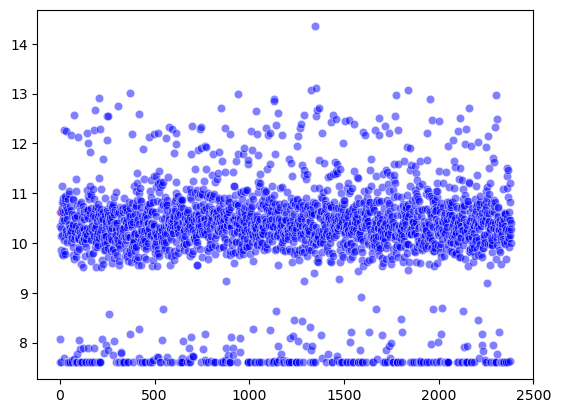

In [140]:
sns.scatterplot(y_pred, color='red', alpha=0.5)
sns.scatterplot(y_test, color='blue', alpha=0.5)
